In [9]:
import numpy as np
from PIL import Image as im
import tensorflow as tf
import matplotlib.pyplot as plt
import pydot
from keras.utils.vis_utils import plot_model
import tensorflow_addons as tfa
import pandas as pd

In [2]:
data = np.load("/kaggle/input/commonicmsexp/Dataset_Experiment.npy")

In [3]:
drate = 0.3
decision_act = tf.keras.activations.relu
img_act = tf.keras.activations.relu
dense_size = 256

In [4]:
def seq(x):
    img = tf.keras.layers.concatenate([x,x,x],axis = -1)
    backbone = tf.keras.applications.ResNet50( input_shape = (32,32,3), include_top = False , weights = "imagenet")
    lastlayer = backbone.get_layer("conv3_block4_out")
    base_model = tf.keras.Model(backbone.input, lastlayer.output)
    base_model.trainable = True
    x = base_model(img, training = True)
    x = tf.keras.layers.GlobalAvgPool2D()(x)
    return x

In [5]:
def augment(x):
    y = tf.keras.layers.RandomRotation(0.2)(x)
    y = tf.keras.layers.RandomFlip(mode = "horizontal_and_vertical")(y)
    y = x
    return y

In [6]:
input1 = tf.keras.Input(shape = (2048,) , name = "flattend_img")
channel1 = input1[:,0:1024]
#channel2 = input1[:,1024:2048]
channel1 = tf.keras.layers.Reshape((32,32,1))(channel1)
#channel2 = tf.keras.layers.Reshape((32,32,1))(channel2)
channel1 = tf.keras.layers.Rescaling(scale=1./255)(channel1)
#channel2 = tf.keras.layers.Rescaling(scale=1./255)(channel2)
channel1 = augment(channel1)
#channel2 = augment(channel2)
x = seq(channel1)
#y = seq(channel2)
#z = tf.keras.layers.concatenate([x,y], axis = -1)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
model = tf.keras.Model(input1, x)
#Channel 2 is noisy and hence only confuses the model further

2022-04-08 06:37:03.410359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 06:37:03.516745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 06:37:03.517668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 06:37:03.519446: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


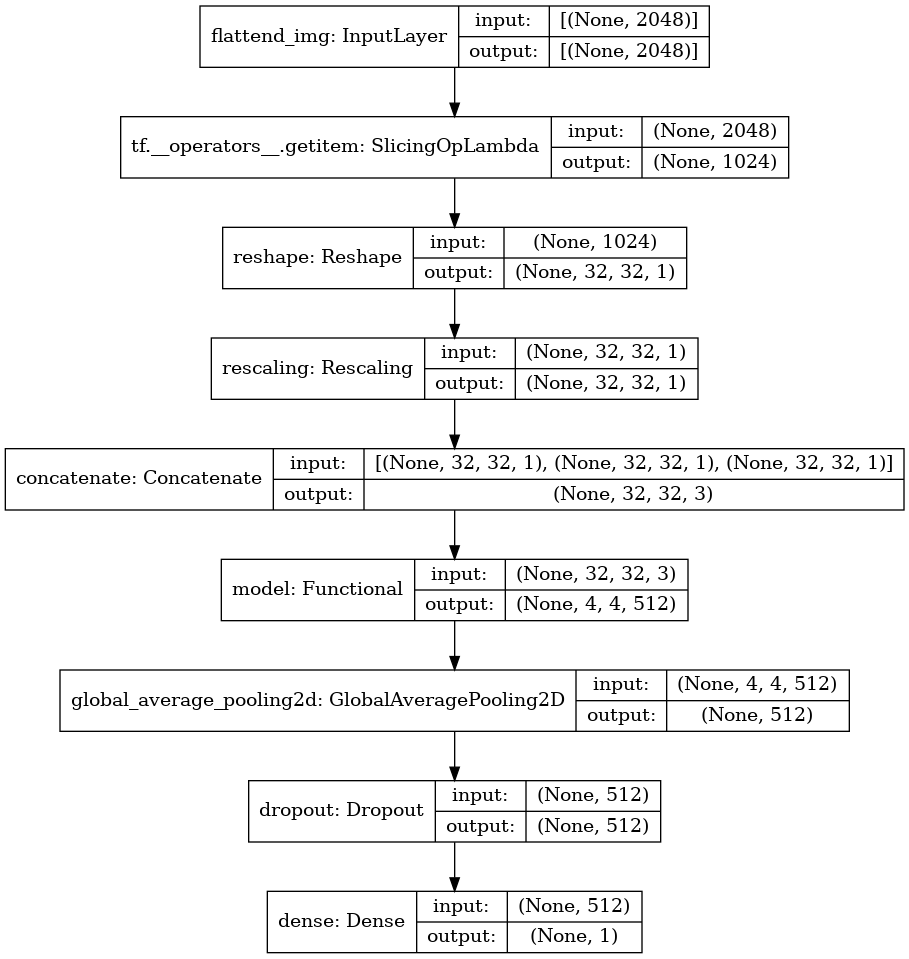

In [7]:
plot_model(model, "model.png", show_shapes=True)

In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999),
        loss="binary_crossentropy",
        metrics=["accuracy", "AUC"]
)

In [9]:
rd_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0001
)


In [10]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "./cp_{epoch}_.ckpt",
    monitor='val_loss',
    verbose=1,
    save_best_only=False,
    save_weights_only=True,
    mode='auto',
    save_freq = 438
)


In [11]:
history = model.fit(
        data[:,:2048],
        data[:,2048],
        validation_split=0.1,
        verbose = 2,
        batch_size = 1024,
        shuffle = True,
        callbacks = [checkpoint , rd_lr],
        epochs=100)

2022-04-08 06:37:09.418319: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 917913600 exceeds 10% of free system memory.
2022-04-08 06:37:10.413344: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 917913600 exceeds 10% of free system memory.
2022-04-08 06:37:11.127617: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-08 06:37:15.216244: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005



Epoch 00001: saving model to ./cp_1_.ckpt
438/438 - 48s - loss: 0.6015 - accuracy: 0.6927 - auc: 0.7469 - val_loss: 0.5652 - val_accuracy: 0.7184 - val_auc: 0.7817
Epoch 2/100

Epoch 00002: saving model to ./cp_2_.ckpt
438/438 - 37s - loss: 0.5498 - accuracy: 0.7261 - auc: 0.7925 - val_loss: 0.5468 - val_accuracy: 0.7269 - val_auc: 0.7962
Epoch 3/100

Epoch 00003: saving model to ./cp_3_.ckpt
438/438 - 37s - loss: 0.5426 - accuracy: 0.7305 - auc: 0.7990 - val_loss: 0.5375 - val_accuracy: 0.7345 - val_auc: 0.8052
Epoch 4/100

Epoch 00004: saving model to ./cp_4_.ckpt
438/438 - 37s - loss: 0.5367 - accuracy: 0.7341 - auc: 0.8043 - val_loss: 0.5356 - val_accuracy: 0.7334 - val_auc: 0.8058
Epoch 5/100

Epoch 00005: saving model to ./cp_5_.ckpt
438/438 - 37s - loss: 0.5346 - accuracy: 0.7353 - auc: 0.8063 - val_loss: 0.5373 - val_accuracy: 0.7341 - val_auc: 0.8038
Epoch 6/100

Epoch 00006: saving model to ./cp_6_.ckpt
438/438 - 37s - loss: 0.5320 - accuracy: 0.7377 - auc: 0.8084 - val_loss

In [12]:
import pandas as pd
pd.DataFrame.from_dict(history.history).to_csv('history.csv',index=False)


In [10]:
history = pd.read_csv("./history.csv")

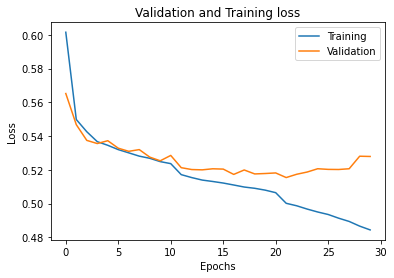

In [12]:
plt.plot(np.array(range(0,30)), np.array(history["loss"])[:30] , label = "Training")
plt.plot(np.array(range(0,30)), np.array(history["val_loss"])[:30] , label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation and Training loss")
plt.legend()
plt.show()

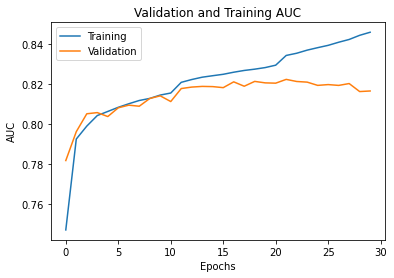

In [15]:
plt.plot(np.array(range(0,30)), np.array(history["auc"])[:30] , label = "Training")
plt.plot(np.array(range(0,30)), np.array(history["val_auc"])[:30] , label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.title("Validation and Training AUC")
plt.legend()
plt.show()

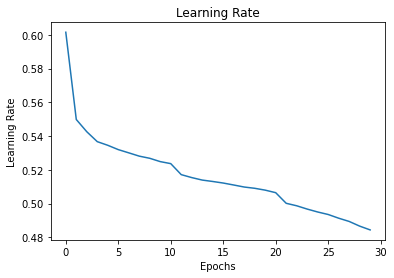

In [16]:
plt.plot(np.array(range(0,30)), np.array(history["loss"])[:30])
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Learning Rate")
plt.show()